In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas_datareader

In [3]:
import datetime
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
# import cufflinks as cf
# cf.set_config_file(offline=True)

In [4]:
yf.pdr_override()

In [5]:
stock_symbol= ["GME", "TGT", "BND","F","SPY"]

In [6]:
gme=pdr.get_data_yahoo("GME", start="2011-01-01", end="2021-01-01")
gme=gme.dropna()
gme=gme.loc[:,["Open","Close"]]
gme=gme.rename(columns={"Open": "GME_Open", "Close": "GME_Close"})
gme

[*********************100%***********************]  1 of 1 completed


,GME_Open,GME_Close
Date,,
2010-12-31,5.7375,5.7200
2011-01-03,5.7675,5.7275
2011-01-04,5.7425,5.6250
2011-01-05,5.6225,5.4725
2011-01-06,5.3225,5.1575
...,...,...
2020-12-24,5.2525,5.0375
2020-12-28,5.3275,5.2475
2020-12-29,5.2050,4.8450


In [7]:
tgt=pdr.get_data_yahoo("TGT", "2011-01-01", "2021-01-01")
tgt=tgt.dropna()
tgt=tgt[["Open","Close"]]
tgt=tgt.rename(columns={"Open": "TGT_Open", "Close": "TGT_Close"})
tgt

[*********************100%***********************]  1 of 1 completed


,TGT_Open,TGT_Close
Date,,
2010-12-31,59.939999,60.130001
2011-01-03,60.259998,60.770000
2011-01-04,60.639999,59.990002
2011-01-05,59.480000,58.939999
2011-01-06,55.810001,54.930000
...,...,...
2020-12-24,175.979996,175.190002
2020-12-28,177.110001,176.389999
2020-12-29,177.110001,175.039993


In [8]:
bnd=pdr.get_data_yahoo("BND", "2011-01-01", "2021-01-01")
bnd=bnd.dropna()
bnd=bnd.loc[:,["Open","Close"]]
bnd=bnd.rename(columns={"Open": "BND_Open", "Close": "BND_Close"})
bnd

[*********************100%***********************]  1 of 1 completed


,BND_Open,BND_Close
Date,,
2010-12-31,80.000000,80.269997
2011-01-03,80.029999,80.169998
2011-01-04,80.220001,80.180000
2011-01-05,79.930000,79.830002
2011-01-06,79.900002,79.900002
...,...,...
2020-12-24,87.989998,88.010002
2020-12-28,87.940002,87.980003
2020-12-29,87.949997,88.010002


In [9]:
f=pdr.get_data_yahoo("F", "2011-01-01", "2021-01-01")
f=f.dropna()
f=f.loc[:,["Open","Close"]]
f=f.rename(columns={"Open": "F_Open", "Close": "F_Close"})
f

[*********************100%***********************]  1 of 1 completed


,F_Open,F_Close
Date,,
2010-12-31,16.650000,16.790001
2011-01-03,17.020000,17.250000
2011-01-04,17.389999,17.379999
2011-01-05,17.309999,17.889999
2011-01-06,18.030001,18.219999
...,...,...
2020-12-24,9.010000,8.860000
2020-12-28,8.920000,8.890000
2020-12-29,8.930000,8.820000


In [10]:
spy=pdr.get_data_yahoo("SPY", start="2011-01-01", end="2021-01-01")
spy=spy.dropna()
spy=spy.loc[:,["Open","Close"]]
spy=spy.rename(columns={"Open": "SPY_Open", "Close": "SPY_Close"})
spy

[*********************100%***********************]  1 of 1 completed


,SPY_Open,SPY_Close
Date,,
2010-12-31,125.529999,125.750000
2011-01-03,126.709999,127.050003
2011-01-04,127.330002,126.980003
2011-01-05,126.580002,127.639999
2011-01-06,127.690002,127.389999
...,...,...
2020-12-24,368.079987,369.000000
2020-12-28,371.739990,372.170013
2020-12-29,373.809998,371.459991


In [11]:
df=pd.concat([gme, tgt, bnd, f, spy], axis=1)
df

,GME_Open,GME_Close,TGT_Open,TGT_Close,BND_Open,BND_Close,F_Open,F_Close,SPY_Open,SPY_Close
Date,,,,,,,,,,
2010-12-31,5.7375,5.7200,59.939999,60.130001,80.000000,80.269997,16.650000,16.790001,125.529999,125.750000
2011-01-03,5.7675,5.7275,60.259998,60.770000,80.029999,80.169998,17.020000,17.250000,126.709999,127.050003
2011-01-04,5.7425,5.6250,60.639999,59.990002,80.220001,80.180000,17.389999,17.379999,127.330002,126.980003
2011-01-05,5.6225,5.4725,59.480000,58.939999,79.930000,79.830002,17.309999,17.889999,126.580002,127.639999
2011-01-06,5.3225,5.1575,55.810001,54.930000,79.900002,79.900002,18.030001,18.219999,127.690002,127.389999
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,5.2525,5.0375,175.979996,175.190002,87.989998,88.010002,9.010000,8.860000,368.079987,369.000000
2020-12-28,5.3275,5.2475,177.110001,176.389999,87.940002,87.980003,8.920000,8.890000,371.739990,372.170013
2020-12-29,5.2050,4.8450,177.110001,175.039993,87.949997,88.010002,8.930000,8.820000,373.809998,371.459991


In [12]:
start=datetime.datetime(2011,1,1)
end=datetime.datetime(2021,1,1)

gme=pdr.get_data_yahoo("GME",start,end)[["Open","Close"]].rename(columns={'Open':'GME_Open','Close':'GME_Close'})
tgt=pdr.get_data_yahoo("TGT",start,end)[["Open","Close"]].rename(columns={'Open':'TGT_Open','Close':'TGT_Close'})
bnd=pdr.get_data_yahoo("BND",start,end)[["Open","Close"]].rename(columns={'Open':'BND_Open','Close':'BND_Close'})
f=pdr.get_data_yahoo("F",start,end)[["Open","Close"]].rename(columns={'Open':'F_Open','Close':'F_Close'})
spy=pdr.get_data_yahoo("SPY",start,end)[["Open","Close"]].rename(columns={'Open':'SPY_Open','Close':'SPY_Close'})


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
st=gme.merge(tgt,on='Date').merge(bnd,on='Date').merge(f,on='Date').merge(spy,on='Date')

In [14]:
st=st.dropna()
st

,GME_Open,GME_Close,TGT_Open,TGT_Close,BND_Open,BND_Close,F_Open,F_Close,SPY_Open,SPY_Close
Date,,,,,,,,,,
2010-12-31,5.7375,5.7200,59.939999,60.130001,80.000000,80.269997,16.650000,16.790001,125.529999,125.750000
2011-01-03,5.7675,5.7275,60.259998,60.770000,80.029999,80.169998,17.020000,17.250000,126.709999,127.050003
2011-01-04,5.7425,5.6250,60.639999,59.990002,80.220001,80.180000,17.389999,17.379999,127.330002,126.980003
2011-01-05,5.6225,5.4725,59.480000,58.939999,79.930000,79.830002,17.309999,17.889999,126.580002,127.639999
2011-01-06,5.3225,5.1575,55.810001,54.930000,79.900002,79.900002,18.030001,18.219999,127.690002,127.389999
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,5.2525,5.0375,175.979996,175.190002,87.989998,88.010002,9.010000,8.860000,368.079987,369.000000
2020-12-28,5.3275,5.2475,177.110001,176.389999,87.940002,87.980003,8.920000,8.890000,371.739990,372.170013
2020-12-29,5.2050,4.8450,177.110001,175.039993,87.949997,88.010002,8.930000,8.820000,373.809998,371.459991


In [15]:
df_years_3=st.loc["2011":"2013",["GME_Close","TGT_Close","BND_Close","F_Close","SPY_Close"]]
df_years_3[['Return_GME','Return_TGT','Return_F','Return_SPY','Return_BND']]=df_years_3[["GME_Close","TGT_Close","BND_Close","F_Close","SPY_Close"]]
df_years_3=df_years_3[['Return_GME','Return_TGT','Return_F','Return_SPY','Return_BND']].pct_change()
df_years_3=df_years_3.dropna()
df_years_3

,Return_GME,Return_TGT,Return_F,Return_SPY,Return_BND
Date,,,,,
2011-01-04,-0.017896,-0.012835,0.000125,0.007536,-0.000551
2011-01-05,-0.027111,-0.017503,-0.004365,0.029344,0.005198
2011-01-06,-0.057561,-0.068035,0.000877,0.018446,-0.001959
2011-01-07,0.006786,0.002185,0.003755,0.002744,-0.001962
2011-01-10,-0.003370,0.003088,0.002369,0.002189,-0.001258
...,...,...,...,...,...
2013-12-24,0.008907,-0.002747,-0.005094,0.002640,0.002191
2013-12-26,-0.011968,0.012478,-0.001499,0.009217,0.005084
2013-12-27,-0.026211,-0.005282,0.000000,-0.001957,-0.000054


In [16]:
matrix_of_return_values = np.asmatrix(df_years_3)
matrix_of_return_values=df_years_3.values.T

no_of_portfolios=10000
no_of_asset_classes=5
np.random.seed(123)
matrix_of_return_values = np.random.randn(no_of_portfolios,no_of_asset_classes)

collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [17]:
def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights = random_asset_weights / random_asset_weights.sum()
   
    return np.asmatrix (random_asset_weights)

In [18]:
def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.mean(matrix_of_return_values, axis = 0)
    asset_covariances = np.cov(matrix_of_return_values.T)
    portfolio_mean = np.dot(asset_weights, asset_means)
    #portfolio_mean = #todo second line if needed.
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    #portfolio_standard_deviation = #todo second line if needed.
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation 
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio

In [19]:
while len(collection_of_random_asset_weights)< no_of_portfolios:
    random_asset_weights = get_random_asset_weights (no_of_asset_classes=no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    m,sd,sr = get_portfolio_statistics(random_asset_weights, matrix_of_return_values)
    portfolio_means.append(m.item())
    portfolio_standard_deviations.append(sd.item())
    portfolio_sharpe_ratios.append(sr.item())

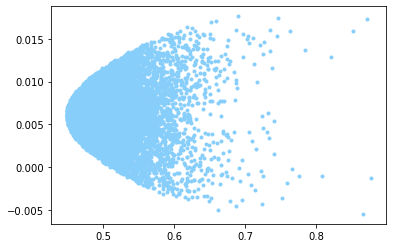

In [20]:
plt.plot(portfolio_standard_deviations, portfolio_means,'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [21]:
index =np.argmax(portfolio_sharpe_ratios)
index

8984

In [22]:
print(collection_of_random_asset_weights[index])
print(portfolio_sharpe_ratios[index])

[[0.11256255 0.49712556 0.02730961 0.01981804 0.34318424]]
0.026519119520617


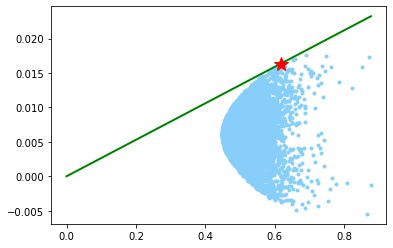

In [23]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color="red",marker="*",markersize = 15)
plt.show()

In [24]:
data=pd.DataFrame()
data.loc[df_years_3.index[-1],df_years_3.columns]=collection_of_random_asset_weights[index]
data.rename(columns={})

,Return_GME,Return_TGT,Return_F,Return_SPY,Return_BND
2013-12-31,0.112563,0.497126,0.02731,0.019818,0.343184


In [25]:
some_weights = pd.DataFrame({"GME": [0.234324], "TGT": [0.032973], "BND": [0.474916], "F": [0.001196], "SPY": [0.256592]}, index = [df_years_3.last_valid_index()])
some_weights

,GME,TGT,BND,F,SPY
2013-12-31,0.234324,0.032973,0.474916,0.001196,0.256592


In [26]:
capital = 100_000
allocation = capital*some_weights
allocation

,GME,TGT,BND,F,SPY
2013-12-31,23432.4,3297.3,47491.6,119.6,25659.2


In [27]:
print(df["GME_Open"].loc[some_weights.last_valid_index()])
print(df["TGT_Open"].loc[some_weights.last_valid_index()])
print(df["BND_Open"].loc[some_weights.last_valid_index()])
print(df["F_Open"].loc[some_weights.last_valid_index()])
print(df["SPY_Open"].loc[some_weights.last_valid_index()])

no_of_shares = allocation 
# no_of_shares[['GMG','TGT','BND','F','SPY']].iloc[0] /= df[["GME_Close","TGT_Close","BND_Close","F_Close","SPY_Close"]].loc[some_weights.last_valid_index()]
no_of_shares["GME"].iloc[0] /= df["GME_Open"].loc[some_weights.last_valid_index()]
no_of_shares["TGT"].iloc[0] /= df["TGT_Open"].loc[some_weights.last_valid_index()]
no_of_shares["BND"].iloc[0] /= df["BND_Open"].loc[some_weights.last_valid_index()]
no_of_shares["F"].iloc[0] /= df['F_Open'].loc[some_weights.last_valid_index()]
no_of_shares["SPY"].iloc[0] /= df["SPY_Open"].loc[some_weights.last_valid_index()]

no_of_shares

12.359999656677246
62.56999969482422
80.05999755859375
15.289999961853027
184.07000732421875


,GME,TGT,BND,F,SPY
2013-12-31,1895.825295,52.697779,593.200118,7.822106,139.399136


In [28]:
weights =(0.234324,	0.032973,	0.474916,	0.001196,	0.256592)

capital = 100_000

In [29]:
gme_shares =  (capital * weights[0]) / df["GME_Open"].iloc[0]
gme_shares

4084.0782956032917

In [30]:
tgt_shares =  (capital * weights[1]) / df["TGT_Open"].iloc[0]
tgt_shares

55.01001127034959

In [31]:
bnd_shares =  (capital * weights[2]) / df["BND_Open"].iloc[0]
bnd_shares

593.645

In [32]:
f_shares =  (capital * weights[3]) / df["F_Open"].iloc[0]
f_shares

7.183183347757778

In [33]:
spy_shares =  (capital * weights[4]) / df["SPY_Open"].iloc[0]
spy_shares

204.40691666948265

In [34]:
seven_years = df.loc['2013-12-31':] 
seven_years['SFA_fund_Open'] = seven_years['GME_Open']*no_of_shares['GME'].iloc[0] + seven_years['TGT_Open']*no_of_shares['TGT'].iloc[0] + seven_years['BND_Open']*no_of_shares['BND'].iloc[0]+ seven_years['F_Open']*no_of_shares['F'].iloc[0]+ seven_years['SPY_Open']*no_of_shares['SPY'].iloc[0]
seven_years['SFA_fund_Close'] = seven_years['GME_Close']*no_of_shares['GME'].iloc[0] + seven_years['TGT_Close']*no_of_shares['TGT'].iloc[0]+ seven_years['BND_Close']*no_of_shares['BND'].iloc[0]+ seven_years['F_Close']*no_of_shares['F'].iloc[0]+ seven_years['SPY_Close']*no_of_shares['SPY'].iloc[0]
seven_years = seven_years[['SFA_fund_Open','SFA_fund_Close']]
seven_years

C:\Users\Hp\AppData\Local\Temp/ipykernel_8996/772522182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_years['SFA_fund_Open'] = seven_years['GME_Open']*no_of_shares['GME'].iloc[0] + seven_years['TGT_Open']*no_of_shares['TGT'].iloc[0] + seven_years['BND_Open']*no_of_shares['BND'].iloc[0]+ seven_years['F_Open']*no_of_shares['F'].iloc[0]+ seven_years['SPY_Open']*no_of_shares['SPY'].iloc[0]
C:\Users\Hp\AppData\Local\Temp/ipykernel_8996/772522182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sev

,SFA_fund_Open,SFA_fund_Close
Date,,
2013-12-31,100000.100000,100033.269341
2014-01-02,99925.441743,100008.235994
2014-01-03,100079.969786,99832.544849
2014-01-06,99969.364156,99270.939858
2014-01-07,99546.525702,97566.877269
...,...,...
2020-12-24,122807.763782,122497.472457
2020-12-28,123489.339133,123383.169537
2020-12-29,123551.664841,122467.228521


<AxesSubplot:xlabel='Date'>

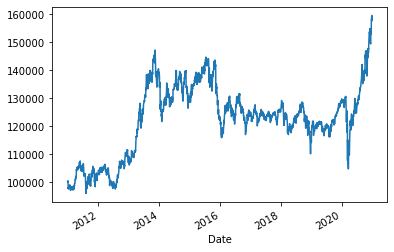

In [35]:
portfolio = (df[["GME_Close", "TGT_Close", "BND_Close","F_Close","SPY_Close"]] * [gme_shares, tgt_shares, bnd_shares,f_shares,spy_shares]).sum(axis=1).plot()
portfolio

[*********************100%***********************]  1 of 1 completed
Absolute Return of Our Portfolio:22.73%
CAGR of Our Portfolio: 2.07%
Information Ratio of Our Portfolio:-5.17



<AxesSubplot:xlabel='Date'>

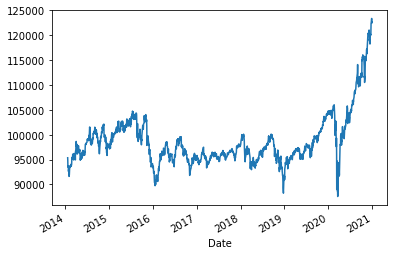

In [44]:
absolute_return_SFA = (seven_years['SFA_fund_Close'].iloc[-1]-capital)/capital
CAGR_SFA = ((seven_years['SFA_fund_Close'].iloc[-1]/capital)**(365/(df.index[-1] - df.index[0]).days))-1

# I choosed S&P500. To be the benchmark.
df_SP500 = pdr.get_data_yahoo('^GSPC', '2014-01-01', '2021-10-30')
df_SP500 = df_SP500[['Open', 'Close']]
df_SP500 = df_SP500.rename(columns = {'Open': 'Open_SP500', 'Close': 'Close_SP500'})

information_ratio_SFA = (seven_years.SFA_fund_Close.pct_change().dropna().mean() - df_SP500.Close_SP500.pct_change().dropna().mean())/(seven_years.SFA_fund_Close.pct_change().dropna().std()*df_SP500.Close_SP500.pct_change().dropna().std())

SFA=f"""Absolute Return of Our Portfolio:{absolute_return_SFA*100:.2f}%
CAGR of Our Portfolio: {CAGR_SFA*100:.2f}%
Information Ratio of Our Portfolio:{information_ratio_SFA:.2f}
"""
print(SFA)
seven_years.SFA_fund_Close.plot()

In [37]:
short_time = 5
long_time = 15
seven_years['Close_short_Rolling'] = seven_years['SFA_fund_Close'].rolling(window = short_time).mean()
seven_years['Close_long_Rolling'] = seven_years['SFA_fund_Close'].rolling(window = long_time).mean()
seven_years['Window_diff'] = seven_years['Close_long_Rolling'] - seven_years['Close_short_Rolling']
seven_years['Open_1_change'] = seven_years['SFA_fund_Open']-seven_years['SFA_fund_Open'].shift(1)
seven_years = seven_years.dropna()
seven_years

,SFA_fund_Open,SFA_fund_Close,Close_short_Rolling,Close_long_Rolling,Window_diff,Open_1_change
Date,,,,,,
2014-01-22,94935.078229,95373.208154,94842.339057,97156.281201,2313.942144,-245.202820
2014-01-23,95366.010177,94800.933716,94921.968426,96807.458826,1885.490400,430.931948
2014-01-24,94553.878926,93508.202978,94662.308384,96374.123291,1711.814907,-812.131251
2014-01-27,93564.957308,93674.249090,94462.740776,95963.570241,1500.829465,-988.921619
2014-01-28,93735.022049,93271.176879,94125.554163,95563.586042,1438.031879,170.064741
...,...,...,...,...,...,...
2020-12-24,122807.763782,122497.472457,121404.039189,120279.187973,-1124.851216,658.052692
2020-12-28,123489.339133,123383.169537,122044.072670,120438.873966,-1605.198704,681.575350
2020-12-29,123551.664841,122467.228521,122531.920355,120564.703684,-1967.216671,62.325708


In [39]:
X = seven_years.copy()
y = np.where(X.SFA_fund_Close.shift(-1) >= X.SFA_fund_Close, 1, -1)
index = int(0.3*len(X))
X_train = X.iloc[:index]
X_test = X.iloc[index:]
y_train = y[:index]
y_test = y[index:]
logistic = LogisticRegression()
logistic = logistic.fit(X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(logistic.coef_)))

,0,1
0,SFA_fund_Open,[0.00035946437722304597]
1,SFA_fund_Close,[-0.000414338400795833]
2,Close_short_Rolling,[1.2843078744152284e-05]
3,Close_long_Rolling,[4.266272640278682e-05]
4,Window_diff,[2.981964765766747e-05]
5,Open_1_change,[-7.303887688872847e-05]


In [45]:
predictions= logistic.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
print(logistic.score(X_test,y_test))

[[233 314]
 [275 403]]
0.5191836734693878


In [47]:
results = X_test.copy()
results['C2C_Price']= X_test.SFA_fund_Close.shift(-1) - X_test.SFA_fund_Close
results['Predictions'] = predictions
results['True_Label']= y_test
results['Return']= results['C2C_Price']*results['Predictions']
results['Cum_Return']= results['Return'].cumsum()
results = results.dropna()
results

,SFA_fund_Open,SFA_fund_Close,Close_short_Rolling,Close_long_Rolling,Window_diff,Open_1_change,C2C_Price,Predictions,True_Label,Return,Cum_Return
Date,,,,,,,,,,,
2016-02-23,93615.349194,93460.505177,93196.104987,91945.977867,-1250.127120,490.242795,524.343853,-1,1,-524.343853,-524.343853
2016-02-24,93317.142944,93984.849030,93400.342849,92132.097989,-1268.244860,-298.206250,524.143172,-1,1,-524.143172,-1048.487024
2016-02-25,93972.132507,94508.992202,93646.303585,92334.920206,-1311.383379,654.989563,152.687668,-1,1,-152.687668,-1201.174692
2016-02-26,94641.897316,94661.679869,94040.355772,92525.071178,-1515.284593,669.764809,-49.544837,-1,-1,49.544837,-1151.629855
2016-02-29,94566.725863,94612.135032,94245.632262,92756.419053,-1489.213209,-75.171453,566.940509,-1,1,-566.940509,-1718.570364
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,122149.711091,122394.475043,120963.029241,120133.177299,-829.851942,1688.054587,102.997413,-1,1,-102.997413,20595.692188
2020-12-24,122807.763782,122497.472457,121404.039189,120279.187973,-1124.851216,658.052692,885.697080,-1,1,-885.697080,19709.995107
2020-12-28,123489.339133,123383.169537,122044.072670,120438.873966,-1605.198704,681.575350,-915.941016,-1,-1,915.941016,20625.936124


Absolute Return of Our Algorithmic Trading:22.46%
Absolute Return of Our buy-and-hold Trading :30.81%
CAGR of Our Algorithmic Trading: 2.05%
CAGR of Our buy-and-hold Trading: 2.72%
Information Ratio of Our Algorithmic Trading:-3.93
Information Ratio of Our buy-and-hold Trading:-3.93



<AxesSubplot:xlabel='Date'>

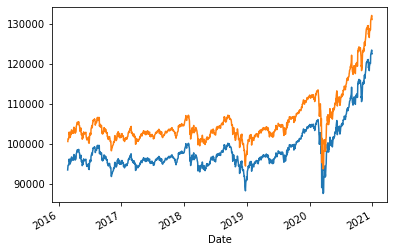

In [50]:
absolute_return_tf = (results['SFA_fund_Close'].iloc[-1]-capital)/capital
CAGR_tf = ((results['SFA_fund_Close'].iloc[-1]/capital)**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio_tf = (results.SFA_fund_Close.pct_change().mean() - df_SP500.Close_SP500.pct_change().dropna().mean())/(results.SFA_fund_Close.pct_change().std()*df_SP500.Close_SP500.pct_change().dropna().std())


absolute_return_bh = (results.SFA_fund_Close.iloc[-1]-results.SFA_fund_Open.iloc[0])/results.SFA_fund_Open.iloc[0]
CAGR_bh = ((results.SFA_fund_Close.iloc[-1]/results.SFA_fund_Open.iloc[0])**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio_bh = (results.SFA_fund_Close.pct_change().mean() - df_SP500.Close_SP500.pct_change().dropna().mean())/(results.SFA_fund_Close.pct_change().std()*df_SP500.Close_SP500.pct_change().dropna().std())

SFA=f"""Absolute Return of Our Algorithmic Trading:{absolute_return_tf*100:.2f}%
Absolute Return of Our buy-and-hold Trading :{absolute_return_bh*100:.2f}%
CAGR of Our Algorithmic Trading: {CAGR_tf*100:.2f}%
CAGR of Our buy-and-hold Trading: {CAGR_bh*100:.2f}%
Information Ratio of Our Algorithmic Trading:{information_ratio_tf:.2f}
Information Ratio of Our buy-and-hold Trading:{information_ratio_bh:.2f}
"""
print(SFA)

# Plot the Equity Curve for the above trading strategy using an appropriate starting value.
results.SFA_fund_Close.plot()

((results.SFA_fund_Close.pct_change().dropna()+1).cumprod()*capital).plot()

In [ ]:
# absolute_return_tf = (df_years_3['GME_Close'].iloc[-1]-capital)/capital
# print(f"Absolute_return_tf:%{np.round(absolute_return_tf,2)*100}")

# Calculate the CAGR or our trend-following trading strategy
# CAGR_tf =((df_years_3['GME_Close'].iloc[-1]/capital)**(252/len(df)))-1
# print(f"CAGR_tf:%{np.round(CAGR_tf,2)*100}")
# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
# information_ratio_tf = (df_years_3.GME_Close.pct_change().mean()/df_years_3.GME_Close.pct_change().std())*((252)**0.5)
# print(f"information_ratio_tf:%{np.round(information_ratio_tf,4)}")
#Plot the equity curve (hint: use 'account_val')
# df_years_3.GME_Close.plot()

In [ ]:
# absolute_return_bh = ((df_years_3.["GME_Close"].iloc[0]-df_years_3.["GME_Open"].iloc[0])/df_years_3.["GME_Open"].iloc[0])*100

# CAGR_bh = ((df_years_3.["GME_Close"].iloc[-1]/df_years_3.["GME_Open"].iloc[0])**(252/len(df)))-1

# information_ratio_bh = (df_years_3.["GME_Close"].pct_change().mean()/df_years_3.["GME_Close"].pct_change().std())*((252)**0.5)

# ((df_years_3.["GME_Close"].pct_change().dropna()+1).cumprod()*capital).plot()